In [1]:
%load_ext rpy2.ipython
%matplotlib inline
from prophet import Prophet
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import logging
logging.getLogger('prophet').setLevel(logging.ERROR)
import warnings
warnings.filterwarnings("ignore")

In [2]:
%%R
library(prophet)

R[write to console]: Loading required package: Rcpp

R[write to console]: Loading required package: rlang



By default Prophet fits additive seasonalities, meaning the effect of the seasonality is added to the trend to get the forecast. This time series of the number of air passengers is an example of when additive seasonality does not work:

R[write to console]: Disabling weekly seasonality. Run prophet with weekly.seasonality=TRUE to override this.

R[write to console]: Disabling daily seasonality. Run prophet with daily.seasonality=TRUE to override this.



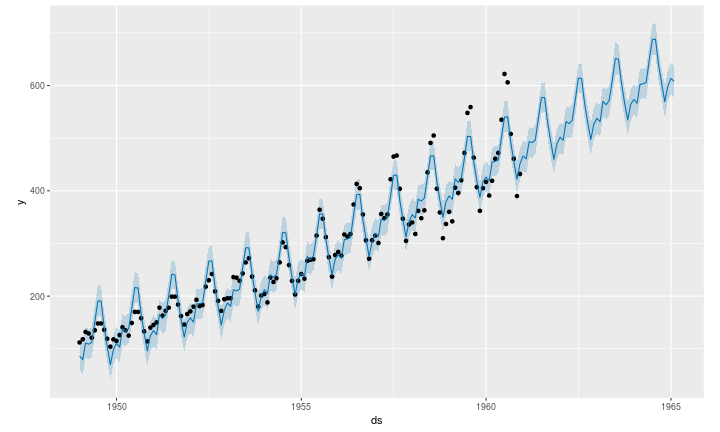

In [3]:
%%R -w 10 -h 6 -u in
df <- read.csv('../examples/example_air_passengers.csv')
m <- prophet(df)
future <- make_future_dataframe(m, 50, freq = 'm')
forecast <- predict(m, future)
plot(m, forecast)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


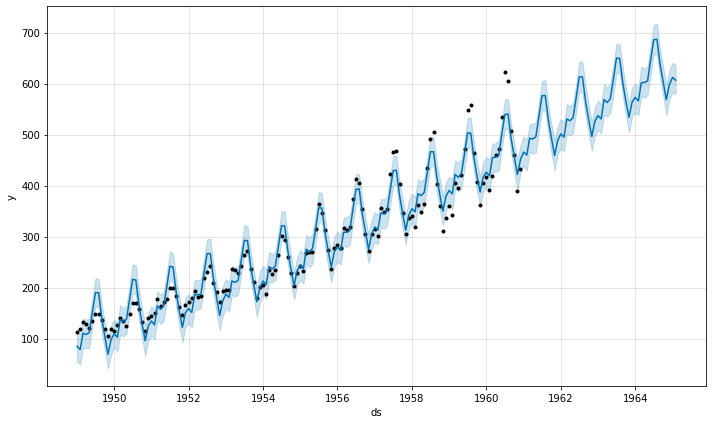

In [2]:
df = pd.read_csv('../examples/example_air_passengers.csv')
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(50, freq='MS')
forecast = m.predict(future)
fig = m.plot(forecast)

This time series has a clear yearly cycle, but the seasonality in the forecast is too large at the start of the time series and too small at the end. In this time series, the seasonality is not a constant additive factor as assumed by Prophet, rather it grows with the trend. This is multiplicative seasonality.

Prophet can model multiplicative seasonality by setting `seasonality_mode='multiplicative'` in the input arguments:

R[write to console]: Disabling weekly seasonality. Run prophet with weekly.seasonality=TRUE to override this.

R[write to console]: Disabling daily seasonality. Run prophet with daily.seasonality=TRUE to override this.



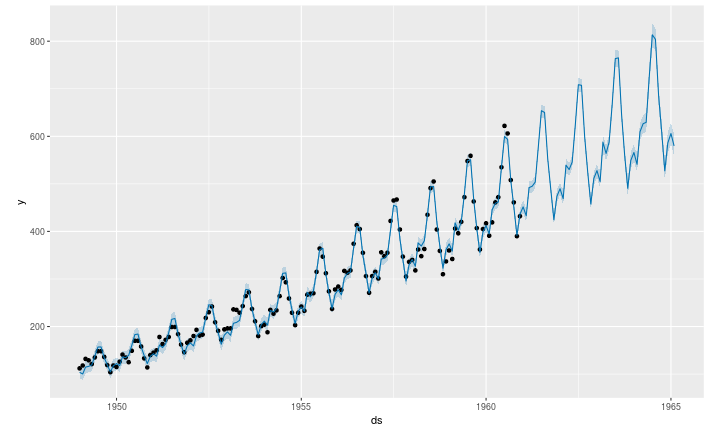

In [4]:
%%R -w 10 -h 6 -u in
m <- prophet(df, seasonality.mode = 'multiplicative')
forecast <- predict(m, future)
plot(m, forecast)

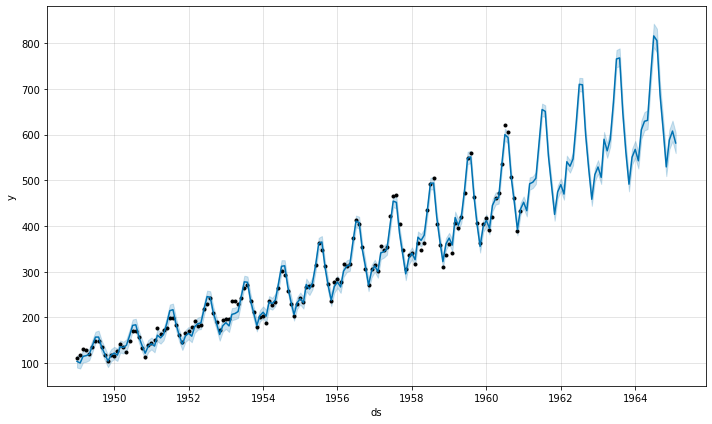

In [3]:
m = Prophet(seasonality_mode='multiplicative')
m.fit(df)
forecast = m.predict(future)
fig = m.plot(forecast)

The components figure will now show the seasonality as a percent of the trend:

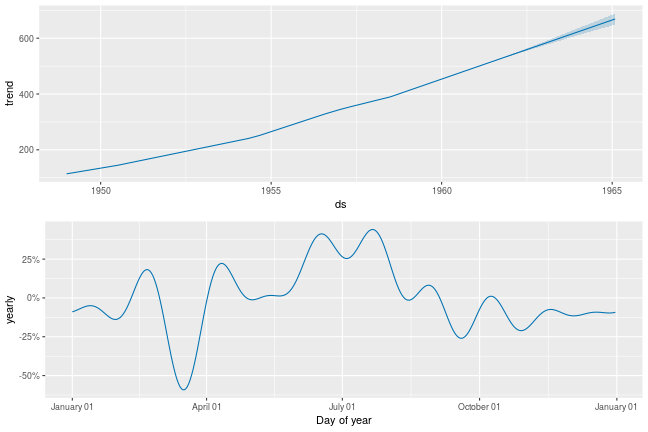

In [5]:
%%R -w 9 -h 6 -u in
prophet_plot_components(m, forecast)

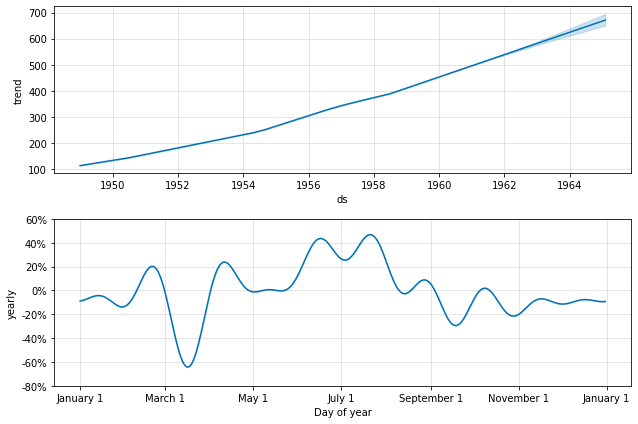

In [4]:
fig = m.plot_components(forecast)

With `seasonality_mode='multiplicative'`, holiday effects will also be modeled as multiplicative. Any added seasonalities or extra regressors will by default use whatever `seasonality_mode` is set to, but can be overriden by specifying `mode='additive'` or `mode='multiplicative'` as an argument when adding the seasonality or regressor.

For example, this block sets the built-in seasonalities to multiplicative, but includes an additive quarterly seasonality and an additive regressor:

In [6]:
%%R
m <- prophet(seasonality.mode = 'multiplicative')
m <- add_seasonality(m, 'quarterly', period = 91.25, fourier.order = 8, mode = 'additive')
m <- add_regressor(m, 'regressor', mode = 'additive')

In [5]:
m = Prophet(seasonality_mode='multiplicative')
m.add_seasonality('quarterly', period=91.25, fourier_order=8, mode='additive')
m.add_regressor('regressor', mode='additive')

Additive and multiplicative extra regressors will show up in separate panels on the components plot. Note, however, that it is pretty unlikely to have a mix of additive and multiplicative seasonalities, so this will generally only be used if there is a reason to expect that to be the case.